In [1]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import Model
from keras.preprocessing.image import ImageDataGenerator

In [3]:
#Download the best model from saved file
best_cnn_model = keras.models.load_model("best_CNN_Datagen_2cl_categ.hdf5")

In [7]:
#Indicate the source of test data for evaluation
test_folder = 'C:/Users/kravc/Final_Project/Data/Skin_classifier/skin_2cl/test/'

In [8]:
#Create generator to feed into the model
datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
#Generate dataset with Keras ImageDataGeneration
test_it_all=datagen.flow_from_directory(test_folder, batch_size=32, target_size=(120,120), shuffle=False, class_mode='categorical')

Found 812 images belonging to 2 classes.


In [13]:
#Predict
y_pred_all = best_cnn_model.predict_generator(test_it_all)

C:\Users\kravc\anaconda3\envs\lhl_bootcamp\lib\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [15]:
#Predicted labels for the whole test set
predicted_ids_all = np.argmax(y_pred_all, axis=-1)
#predicted_labels_all_cnn = dataset_labels[predicted_ids_all_cnn]

## Model evaluation: Confusion Matrix, Precision, Recall, F1 score

In [17]:
from sklearn.metrics import confusion_matrix
cm_cnn = confusion_matrix(test_it_all.classes, predicted_ids_all)
cm_cnn

array([[443,  53],
       [ 31, 285]], dtype=int64)

In [20]:
# Print f1, precision, and recall scores
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix

print('Precision score: ', precision_score(test_it_all.classes, predicted_ids_all, average="macro"))
print('Recall: ', recall_score(test_it_all.classes, predicted_ids_all, average="macro"))
print('F1 score: ',f1_score(test_it_all.classes, predicted_ids_all, average="macro"))

Precision score:  0.8888972111951664
Recall:  0.8975219477337689
F1 score:  0.8924808474415966


## Predicting the class for one image

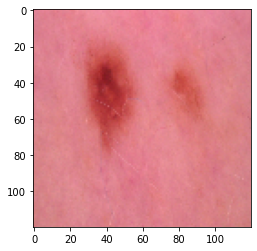

(1, 120, 120, 3)


In [22]:
#Try prediction on one image

%matplotlib inline
import glob
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import imageio as im
from keras.preprocessing import image

img_path = 'C:/Users/kravc/Final_Project/Data/Skin_classifier/skin_2cl/test/0_Non_Cancerous/ISIC_0024670.jpg'
img = image.load_img(img_path, target_size=(120, 120))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
plt.imshow(img_tensor[0])
plt.show()
print(img_tensor.shape)

In [23]:
# Predict image class
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
predict_image=best_cnn_model.predict(images) 
classes=np.argmax(predict_image,axis=1)
print("Predicted class is:",classes)

Predicted class is: [0]


## Predicting the class for the batch of images

In [31]:
test_it=datagen.flow_from_directory(test_folder, batch_size=32, target_size=(120,120), class_mode='categorical')

Found 812 images belonging to 2 classes.


In [32]:
#Checking test shape for the batch
test_image_batch, test_label_batch = next(iter(test_it))
true_label_ids = np.argmax(test_label_batch, axis=-1)
print("Validation batch shape:", test_image_batch.shape)

Validation batch shape: (32, 120, 120, 3)


In [33]:
#Get prediction for the batch
y_pred = best_cnn_model.predict(test_image_batch)
print("Prediction results shape:", y_pred.shape)

Prediction results shape: (32, 2)


In [34]:
#Getting dataset labels
dataset_labels = sorted(test_it_all.class_indices.items(), key=lambda pair:pair[1])
dataset_labels = np.array([key.title() for key, value in dataset_labels])
print(dataset_labels)

['0_Non_Cancerous' '1_Cancerous']


In [35]:
#showing predicted labels
predicted_ids = np.argmax(y_pred, axis=-1)
predicted_labels = dataset_labels[predicted_ids]
print(predicted_labels)

['1_Cancerous' '1_Cancerous' '1_Cancerous' '0_Non_Cancerous'
 '0_Non_Cancerous' '0_Non_Cancerous' '0_Non_Cancerous' '0_Non_Cancerous'
 '0_Non_Cancerous' '0_Non_Cancerous' '1_Cancerous' '1_Cancerous'
 '0_Non_Cancerous' '1_Cancerous' '0_Non_Cancerous' '0_Non_Cancerous'
 '0_Non_Cancerous' '1_Cancerous' '1_Cancerous' '0_Non_Cancerous'
 '1_Cancerous' '1_Cancerous' '1_Cancerous' '0_Non_Cancerous'
 '0_Non_Cancerous' '0_Non_Cancerous' '1_Cancerous' '0_Non_Cancerous'
 '1_Cancerous' '0_Non_Cancerous' '0_Non_Cancerous' '1_Cancerous']


Prediction results shape: (32, 2)


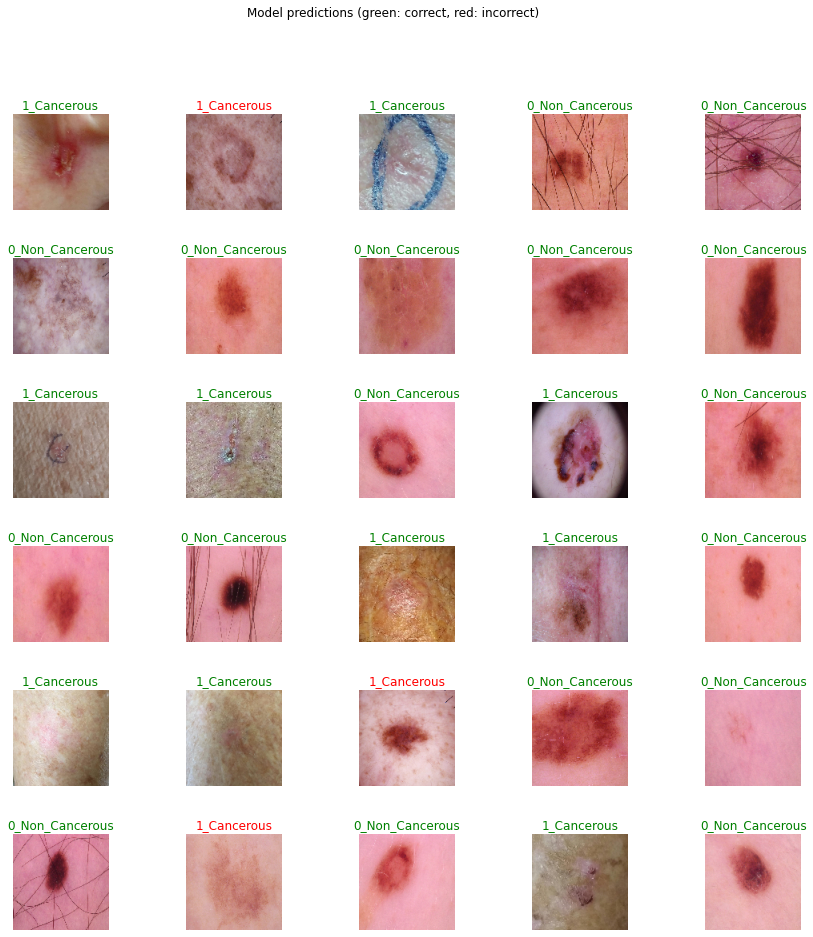

In [36]:
#Visualizing prediction
y_pred = best_cnn_model.predict(test_image_batch)
print("Prediction results shape:", y_pred.shape)
plt.figure(figsize=(15,15))
plt.subplots_adjust(hspace=0.5)
for n in range((len(predicted_labels)-2)):
    plt.subplot(6,5,n+1)
    plt.imshow(test_image_batch[n])
    color = "green" if predicted_ids[n] == true_label_ids[n] else "red"
    plt.title(predicted_labels[n].title(), color=color)
    plt.axis('off')
    _ = plt.suptitle("Model predictions (green: correct, red: incorrect)")